# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1037]:
m = 3
A = 0.001#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [1038]:
res=m;
N=2.0^m*500.0
Xf=1.0;

dx=Xf/N;
dt=round(dx,digits=10);
Nt=2.0^m*500.0
Tf=Nt*dt; #final time
print(Tf)

1.0

In [1039]:
print(N)

4000.0

In [1040]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.00025
dt =0.00025
dx/dt =1.0


In [1041]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [1042]:
include("./ScalarField.jl");

In [1043]:
ori=0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);

initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

step size is  0.00025
the time step is 0.00025


In [1044]:
"""if m==1
    initX1=chebyshev(int((L-6)))
    L1=L;
elseif m==2
    initX1=doublegrid(chebyshev(int((L1-6))))
else
    initX1=doublegrid(doublegrid(chebyshev(int((L1-6)))))
end
initX=collect(initX)
initX[4:L-3]=initX1;"""

"if m==1\n    initX1=chebyshev(int((L-6)))\n    L1=L;\nelseif m==2\n    initX1=doublegrid(chebyshev(int((L1-6))))\nelse\n    initX1=doublegrid(doublegrid(chebyshev(int((L1-6)))))\nend\ninitX=collect(initX)\ninitX[4:L-3]=initX1;"

# Initial data of m β Ψ and Ψ,x

In [1045]:
using Dierckx

####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [1046]:
##AUX
auxinitm=zeros((L-6)*2+5);
auxinitbeta=zeros((L-6)*2+5);
auxinitpsi=zeros((L-6)*2+5);
auxinitderpsi=zeros((L-6)*2+5);
auxinitX=range(round(ori-3.0*dx/2,digits=10), stop=Xf+3.0*dx/2, step=dx/2)
auxinitX1=auxinitX[4:length(auxinitX)-3]
auxL=length(auxinitX)

auxstate_array=[auxinitm auxinitbeta auxinitpsi auxinitderpsi auxinitX];

#PSI
r0=0.7#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3
auxinitpsi[4:auxL-3] = init_gaussian(auxinitX1,r0,sigma,A)

auxstate_array[:,3] = auxinitpsi
auxstate_array = ghost(auxstate_array)

#PSI,X FROM PSI
auxinitderpsi[4:auxL-3] = init_gaussian_der(auxinitX1,r0,sigma,A)
auxstate_array[:,4] = auxinitderpsi
auxstate_array=ghost(auxstate_array)

####

auxderpsi_func = Spline1D(auxinitX[4:auxL-3], auxstate_array[4:auxL-3,4],  k=4);

In [1047]:
"""integ=integrator(initX,derpsi_func)
plot(initX1, integ[4:L-3],xlim=[0,0.001])"""

"integ=integrator(initX,derpsi_func)\nplot(initX1, integ[4:L-3],xlim=[0,0.001])"

In [1048]:
##AUX
y0=[0 0 0]
auxstate_array[4:auxL-3,1:3] = n_rk4wrapper(RHS,y0,auxinitX[4:auxL-3],0,auxderpsi_func,auxstate_array[:,:]);

In [1049]:
y0=[0 0 0]
state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],auxstate_array);
#hereeeeee this would be with interp:
#state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

#state_array = ghost(state_array);

#state_array[4:L-3,3] = rk4wrapper(psiRHS,0,initX[4:L-3],0,derpsi_func,state_array[:,:])

#state_array[4:L-3,3] = integrator(initX,derpsi_func)[4:L-3]

#psi_func = Spline1D(initX[4:L-3],state_array[4:L-3,3],k=4)
#funcs = [psi_func derpsi_func]
        
#y0=[0.0 0.0]
#state_array[4:L-3,1:2] = n_rk4wrapper(mbetaRHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);

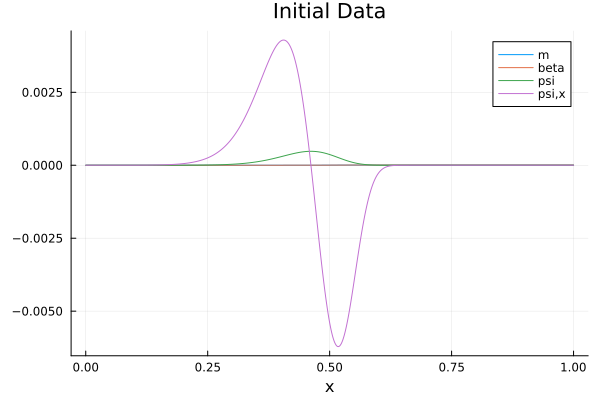

In [1050]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [1051]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3/time_step0.csv"

In [1052]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [1053]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0


 ## Time evolution

fixed grid

In [1054]:
finaltime=1#0.08*2#0.005*10*5#1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run,auxstate_array);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

iteration 10 dt is 0.00025, time of iteration is 0.0025
iteration 20 dt is 0.00025, time of iteration is 0.005
iteration 30 dt is 0.00025, time of iteration is 0.0075
iteration 40 dt is 0.00025, time of iteration is 0.01
iteration 50 dt is 0.00025, time of iteration is 0.0125
iteration 60 dt is 0.00025, time of iteration is 0.015
iteration 70 dt is 0.00025, time of iteration is 0.0175
iteration 80 dt is 0.00025, time of iteration is 0.02
iteration 90 dt is 0.00025, time of iteration is 0.0225
iteration 100 dt is 0.00025, time of iteration is 0.025
iteration 110 dt is 0.00025, time of iteration is 0.0275
iteration 120 dt is 0.00025, time of iteration is 0.03
iteration 130 dt is 0.00025, time of iteration is 0.0325
iteration 140 dt is 0.00025, time of iteration is 0.035
iteration 150 dt is 0.00025, time of iteration is 0.0375
iteration 160 dt is 0.00025, time of iteration is 0.04
iteration 170 dt is 0.00025, time of iteration is 0.0425
iteration 180 dt is 0.00025, time of iteration is 0.

iteration 1460 dt is 0.00025, time of iteration is 0.365
iteration 1470 dt is 0.00025, time of iteration is 0.3675
iteration 1480 dt is 0.00025, time of iteration is 0.37
iteration 1490 dt is 0.00025, time of iteration is 0.3725
iteration 1500 dt is 0.00025, time of iteration is 0.375
iteration 1510 dt is 0.00025, time of iteration is 0.3775
iteration 1520 dt is 0.00025, time of iteration is 0.38
iteration 1530 dt is 0.00025, time of iteration is 0.3825
iteration 1540 dt is 0.00025, time of iteration is 0.385
iteration 1550 dt is 0.00025, time of iteration is 0.3875
iteration 1560 dt is 0.00025, time of iteration is 0.39
iteration 1570 dt is 0.00025, time of iteration is 0.3925
iteration 1580 dt is 0.00025, time of iteration is 0.395
iteration 1590 dt is 0.00025, time of iteration is 0.3975
iteration 1600 dt is 0.00025, time of iteration is 0.4
iteration 1610 dt is 0.00025, time of iteration is 0.4025
iteration 1620 dt is 0.00025, time of iteration is 0.405
iteration 1630 dt is 0.00025

iteration 2900 dt is 0.00025, time of iteration is 0.725
iteration 2910 dt is 0.00025, time of iteration is 0.7275
iteration 2920 dt is 0.00025, time of iteration is 0.73
iteration 2930 dt is 0.00025, time of iteration is 0.7325
iteration 2940 dt is 0.00025, time of iteration is 0.735
iteration 2950 dt is 0.00025, time of iteration is 0.7375
iteration 2960 dt is 0.00025, time of iteration is 0.74
iteration 2970 dt is 0.00025, time of iteration is 0.7425
iteration 2980 dt is 0.00025, time of iteration is 0.745
iteration 2990 dt is 0.00025, time of iteration is 0.7475
iteration 3000 dt is 0.00025, time of iteration is 0.75
iteration 3010 dt is 0.00025, time of iteration is 0.7525
iteration 3020 dt is 0.00025, time of iteration is 0.755
iteration 3030 dt is 0.00025, time of iteration is 0.7575
iteration 3040 dt is 0.00025, time of iteration is 0.76
iteration 3050 dt is 0.00025, time of iteration is 0.7625
iteration 3060 dt is 0.00025, time of iteration is 0.765
iteration 3070 dt is 0.0002

 ## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res3.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res3.gif")
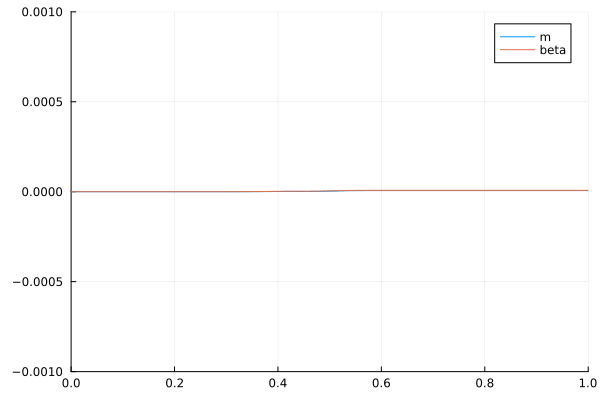

In [1055]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:10:400
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    plot!(initX1, [plot1 plot2 ], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.001, 0.001],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 10)

In [1056]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:1000#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3/monitor_ratio10.csv" is not a valid file or doesn't exist

In [316]:
dt

0.001

0.0078125

In [31]:
state_array[:,4]

207-element Vector{Float64}:
 -2.365518250288725e-9
 -9.136367842295702e-10
 -2.14954583648039e-10
  0.0
  6.986152586784135e-13
  5.661291067212787e-11
  4.3721453478448e-10
  1.681826439904089e-9
  4.6038562839992895e-9
  1.0296050405382373e-8
  2.0137407051887777e-8
  3.5801665455811194e-8
  5.926726083699171e-8
  ⋮
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [37]:

auxinitX= range(0,1,step=dx)
println(Der(state_array,6,4,auxinitX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, auxinitX[6]))

3.017168193837207e-8
0.00017208804225226937


In [53]:
println(Der(state_array,60,4,initX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, initX[60]))

println(derivative(spl, initX[60]).-Der(state_array,60,4,initX))

0.014407887381376435
0.014407810796996974
-7.658437946138352e-8


In [30]:
using Roots
find_zero(derpsi_func, (0,0.5), Bisection())

0.2713799770174635

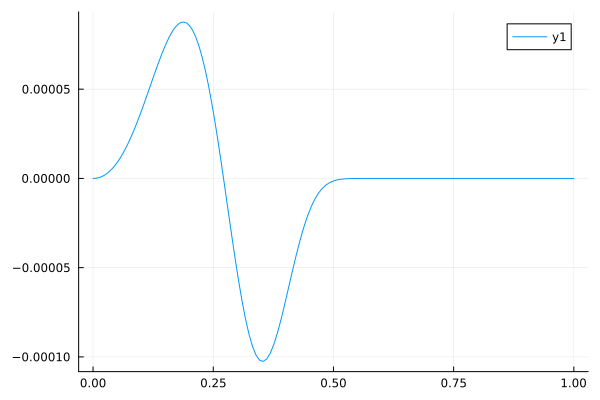

In [23]:
using Plots
plot(initX1, derpsi_func(initX1))

In [66]:
m_func = Spline1D(initX[4:L-3],state_array[4:L-3,1],k=4)
beta_func = Spline1D(initX[4:L-3],state_array[4:L-3,2],k=4)
der_funcs=[derivative(m_func,initX) derivative(beta_func,initX) derivative(derpsi_func,initX)]
der_funcs[2,1] # i is gridpoint, j is function

-1.5086563198078306e-16

In [58]:
derivative(m_func,initX)

207-element Vector{Float64}:
 -3.6298572062043756e-16
 -1.5086563198078306e-16
 -4.2846357130174216e-17
 -3.826449677788914e-18
  1.2955367671949918e-18
  7.621048595599677e-18
  5.1885306005563256e-17
  2.109734086495333e-16
  6.633715930192716e-16
  1.768094158067992e-15
  4.2032891114686175e-15
  9.186535719427543e-15
  1.882331476354324e-14
  ⋮
 -3.776355223175436e-19
 -1.7646519734465227e-20
  1.0587911840678348e-20
  2.2651714422785337e-19
 -1.4750589189488752e-19
 -3.7472920178666525e-19
  6.78866591885402e-20
 -2.96640705754548e-20
  5.421010862427541e-19
  3.1064380724396854e-18
  8.986602830812212e-18
  1.9505851304156383e-17

In [166]:
derivative(derpsi_func,initX1[1])

3.9599527939805415e-10

In [163]:
derivative(derpsi_func,initX1)[1]

3.9599527939805415e-10

In [161]:
derivative(derpsi_func,initX)[4]

3.9599527939805415e-10

In [ ]:
aux=doublegrid(initX1)

using Plots
plot(aux, derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, ylim=[0, 10^(-13)])

##

x2=aux
y2=derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A);

##

double_resolution=y2
basis_resolution=y1
xs = ( x1, x2 )
ys = ( basis_resolution, double_resolution*16*4 )
p = plot()
map(x->plot!(x[1],x[2],xaxis="x",title="Interpolation error", legend=false), zip(xs, ys))
display(p)
     